# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn

- In this chapter, we will take a tour of a selection of popular and powerful machine learning algorithms that are commonly used in academia as well as in industry. 

- We will also develop an appreciation of their individual strengths and weaknesses. 

- we will take our first steps with the scikit-learn library, which offers a user-friendly and consistent interface for using those algorithms efficiently and productively. 

### Overview

- [Choosing a classification algorithm](#Choosing-a-classification-algorithm)
- [First steps with scikit-learn](#First-steps-with-scikit-learn)
    - [Training a perceptron via scikit-learn](#Training-a-perceptron-via-scikit-learn)
- [Modeling class probabilities via logistic regression](#Modeling-class-probabilities-via-logistic-regression)
    - [Logistic regression intuition and conditional probabilities](#Logistic-regression-intuition-and-conditional-probabilities)
    - [Learning the weights of the logistic loss function](#Learning-the-weights-of-the-logistic-loss-function)
    - [Training a logistic regression model with scikit-learn](#Training-a-logistic-regression-model-with-scikit-learn)
    - [Tackling overfitting via regularization](#Tackling-overfitting-via-regularization)
- [Maximum margin classification with support vector machines](#Maximum-margin-classification-with-support-vector-machines)
    - [Maximum margin intuition](#Maximum-margin-intuition)
    - [Dealing with the nonlinearly separable case using slack variables](#Dealing-with-the-nonlinearly-separable-case-using-slack-variables)
    - [Alternative implementations in scikit-learn](#Alternative-implementations-in-scikit-learn)
- [Solving nonlinear problems using a kernel SVM](#Solving-nonlinear-problems-using-a-kernel-SVM)
    - [Using the kernel trick to find separating hyperplanes in higher dimensional space](#Using-the-kernel-trick-to-find-separating-hyperplanes-in-higher-dimensional-space)
- [Decision tree learning](#Decision-tree-learning)
    - [Maximizing information gain – getting the most bang for the buck](#Maximizing-information-gain-–-getting-the-most-bang-for-the-buck)
    - [Building a decision tree](#Building-a-decision-tree)
    - [Combining weak to strong learners via random forests](#Combining-weak-to-strong-learners-via-random-forests)
- [K-nearest neighbors – a lazy learning algorithm](#K-nearest-neighbors-–-a-lazy-learning-algorithm)
- [Summary](#Summary)

# Choosing a classification algorithm

-  Choosing an appropriate classification algorithm for a particular problem task requires practice and experience; each algorithm has its own quirks and is based on certain assumptions. 

- To paraphrase the no free lunch theorem by David H. Wolpert, no single classifier works best across all possible scenarios.
  
- In practice, it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or examples, the amount of noise in a dataset, and whether the classes are linearly separable

> The performance of a classifier — computational performance as well as predictive power — depends heavily on the underlying **data that is available for learning**. 

The five main steps that are involved in training a supervised machine learning algorithm can be summarized as follows: 

1. Selecting features and collecting labeled training examples 

2. Choosing a performance metric 

3. Choosing a learning algorithm and training a model 

4. Evaluating the performance of the model 

5. Changing the settings of the algorithm and tuning the model.

> This chapter focus on the main concepts of the different algorithms and topics such as feature selection and preprocessing, performance metrics, and hyperparameter tuning for more detailed discussions later in the book.

## Previous chapter: Perceptron 

- We learned using perceptron for classification.

In [164]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)


# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


/var/folders/1h/b7ng0kgj3w78mg7n8k7q7rch0000gn/T/ipykernel_85573/398094104.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [171]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias # comp. net input
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias

In [172]:
a = Perceptron(2)

a.train(X_train, y_train, epochs=10)

/var/folders/1h/b7ng0kgj3w78mg7n8k7q7rch0000gn/T/ipykernel_85573/3141560488.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.weights = np.zeros((num_features, 1), dtype=np.float)
/var/folders/1h/b7ng0kgj3w78mg7n8k7q7rch0000gn/T/ipykernel_85573/3141560488.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.bias = np.zeros(1, d

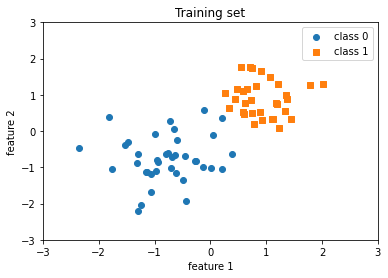

In [173]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

### Training Perceptron

In [174]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.38482282]
 [0.37933695]]

  Bias: [0.]



/var/folders/1h/b7ng0kgj3w78mg7n8k7q7rch0000gn/T/ipykernel_85573/3141560488.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.weights = np.zeros((num_features, 1), dtype=np.float)
/var/folders/1h/b7ng0kgj3w78mg7n8k7q7rch0000gn/T/ipykernel_85573/3141560488.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.bias = np.zeros(1, d

## Evaluating the model

In [ ]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

# First steps with scikit-learn


- Now we will take a look at the scikit-learn API, which combines a user-friendly and consistent interface with a highly optimized implementation of several classification algorithms. 

- The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models. 

- We will discuss this in more detail, together with the underlying concepts, in Chapter 4, Building Good Training Datasets – Data Preprocessing, and Chapter 5, Compressing Data via Dimensionality Reduction. 

### Perceptron via Sklearn

- To get started with the scikit-learn library, we will train a perceptron model similar to the one that we implemented in Chapter 2

- Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. 

- The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.


In [177]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

#Iris flower class names, Iris-setosa, Iris-versicolor, and Iris-virginica, 
#are already stored as integers (here: 0, 1, 2).

Class labels: [0 1 2]


> Although many scikit-learn functions and class methods also work with class labels in string format, using integer labels is a recommended approach to avoid technical glitches and improve computational performance due to a smaller memory footprint; furthermore, encoding class labels as integers is a common convention among most machine learning libraries.

![](./iris_dataset.png)

Splitting data into 70% training and 30% test data:

> To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets.

In [181]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y) #shuffle = TRUE by default

In [180]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

> Note that the train_test_split function already shuffles the training datasets internally before splitting; otherwise, all examples from class 0 and class 1 would have ended up in the training datasets, and the test dataset would consist of 45 examples from class 2.

> We use stratification via **stratify = y**.  In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

- We can use NumPy’s bincount function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [182]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

> Many machine learning and optimization algorithms also require feature scaling for optimal performance, a

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

> Note that we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another

## Training a perceptron via scikit-learn

- Having standardized the training data, we can now train a perceptron model. 

- Most algorithms in scikit-learn already support multiclass classification by default via the one-versus-rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once.

In [184]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
#the model parameter, eta0, is equivalent to the learning rate, eta, that we used in our own perceptron implementation
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

## Prediction

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


- We can see that the perceptron misclassifies 1 out of the 45 flower examples. Thus, the misclassification error on the test dataset is approximately 0.022, or 2.2 percent

> finding an appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global loss minimum. If the learning rate is too small, the algorithm will require more epochs until convergence, which can make the learning slow—especially for large datasets. 

## Accuracy

> The scikit-learn also implements a large variety of different performance metrics that are available via the metrics module. 

> For example, we can calculate the classification accuracy of the perceptron on the test dataset as follows

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


## Classification error versus accuracy

> Instead of the misclassification error, many machine learning practitioners report the classification accuracy of a model, 

> Accuracy is calculated as follows: 1–error = 0.978, or 97.8 percent Whether we use the classification error or accuracy is merely a matter of preference.

## Plotting decision regions

In [187]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

Training a perceptron model using the standardized training data:

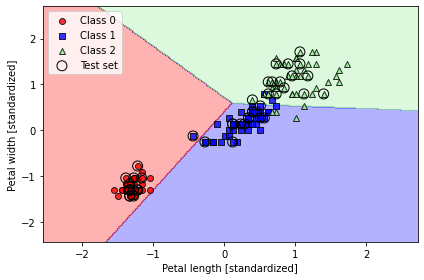

In [188]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

## Putting all altogether

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


# Download the dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y) #shuffle = TRUE by default

# standardize the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# select classifier and Train the model
ppn = Perceptron(eta0=0.1, random_state=1)
#the model parameter, eta0, is equivalent to the learning rate, eta, that we used in our own perceptron implementation
ppn.fit(X_train_std, y_train)

# make prediction
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

# Find model accuracy
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 1
Accuracy: 0.978


## Can we do better? Additional perceptron settings

In [ ]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
 |      Only used if 

# Modeling class probabilities via logistic regression

-  Although the perceptron rule offers a nice and easy-going introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the classes are not perfectly linearly separable. 

- The reason for this is that the weights are continuously being updated since there is always at least one misclassified training example present in each epoch. So, perceptron will never converge on this dataset.

-  We will now take a look at another simple, yet more powerful, algorithm for linear and binary classification problems: **logistic regression**

> Note that, despite its name, logistic regression is a model for classification, not regression.

### Logistic regression intuition and conditional probabilities

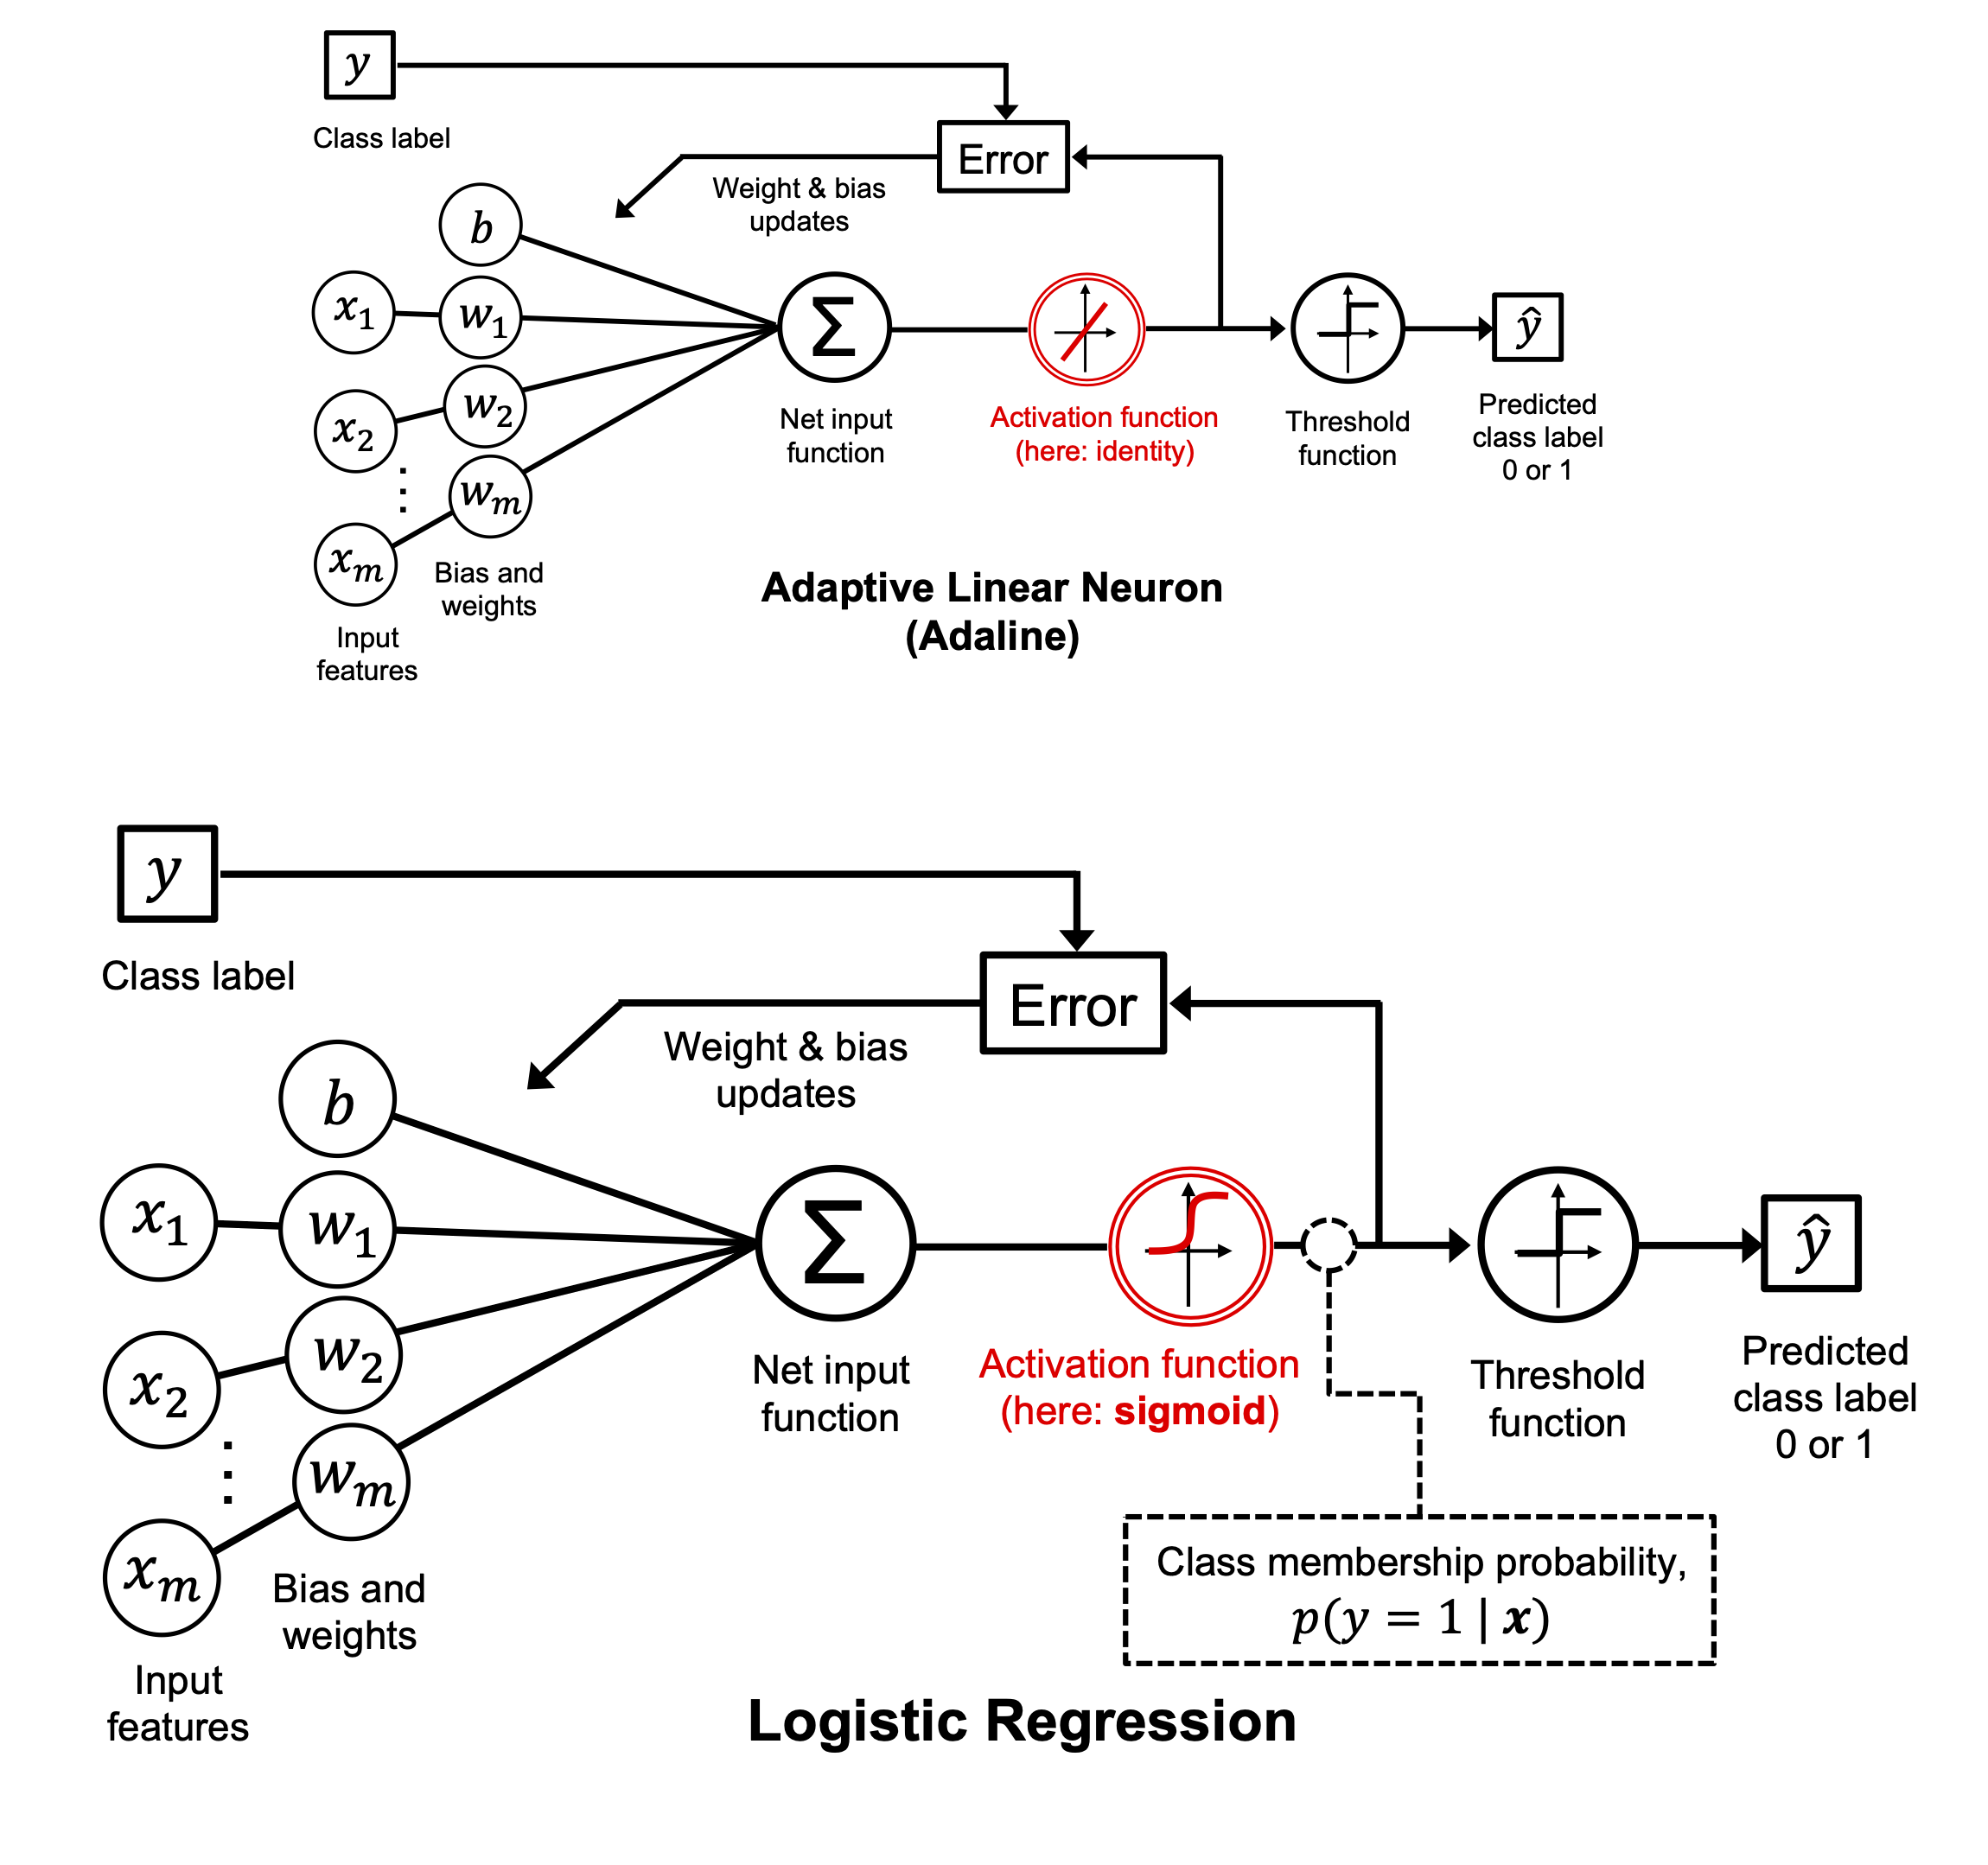

In [ ]:
Image(filename='figures/03_03.png', width=500) 

![](./sigmoid.png)

- let’s plot the sigmoid function for some values in the range –7 to 7 to see how it looks:

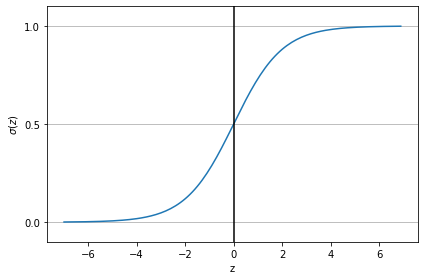

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()

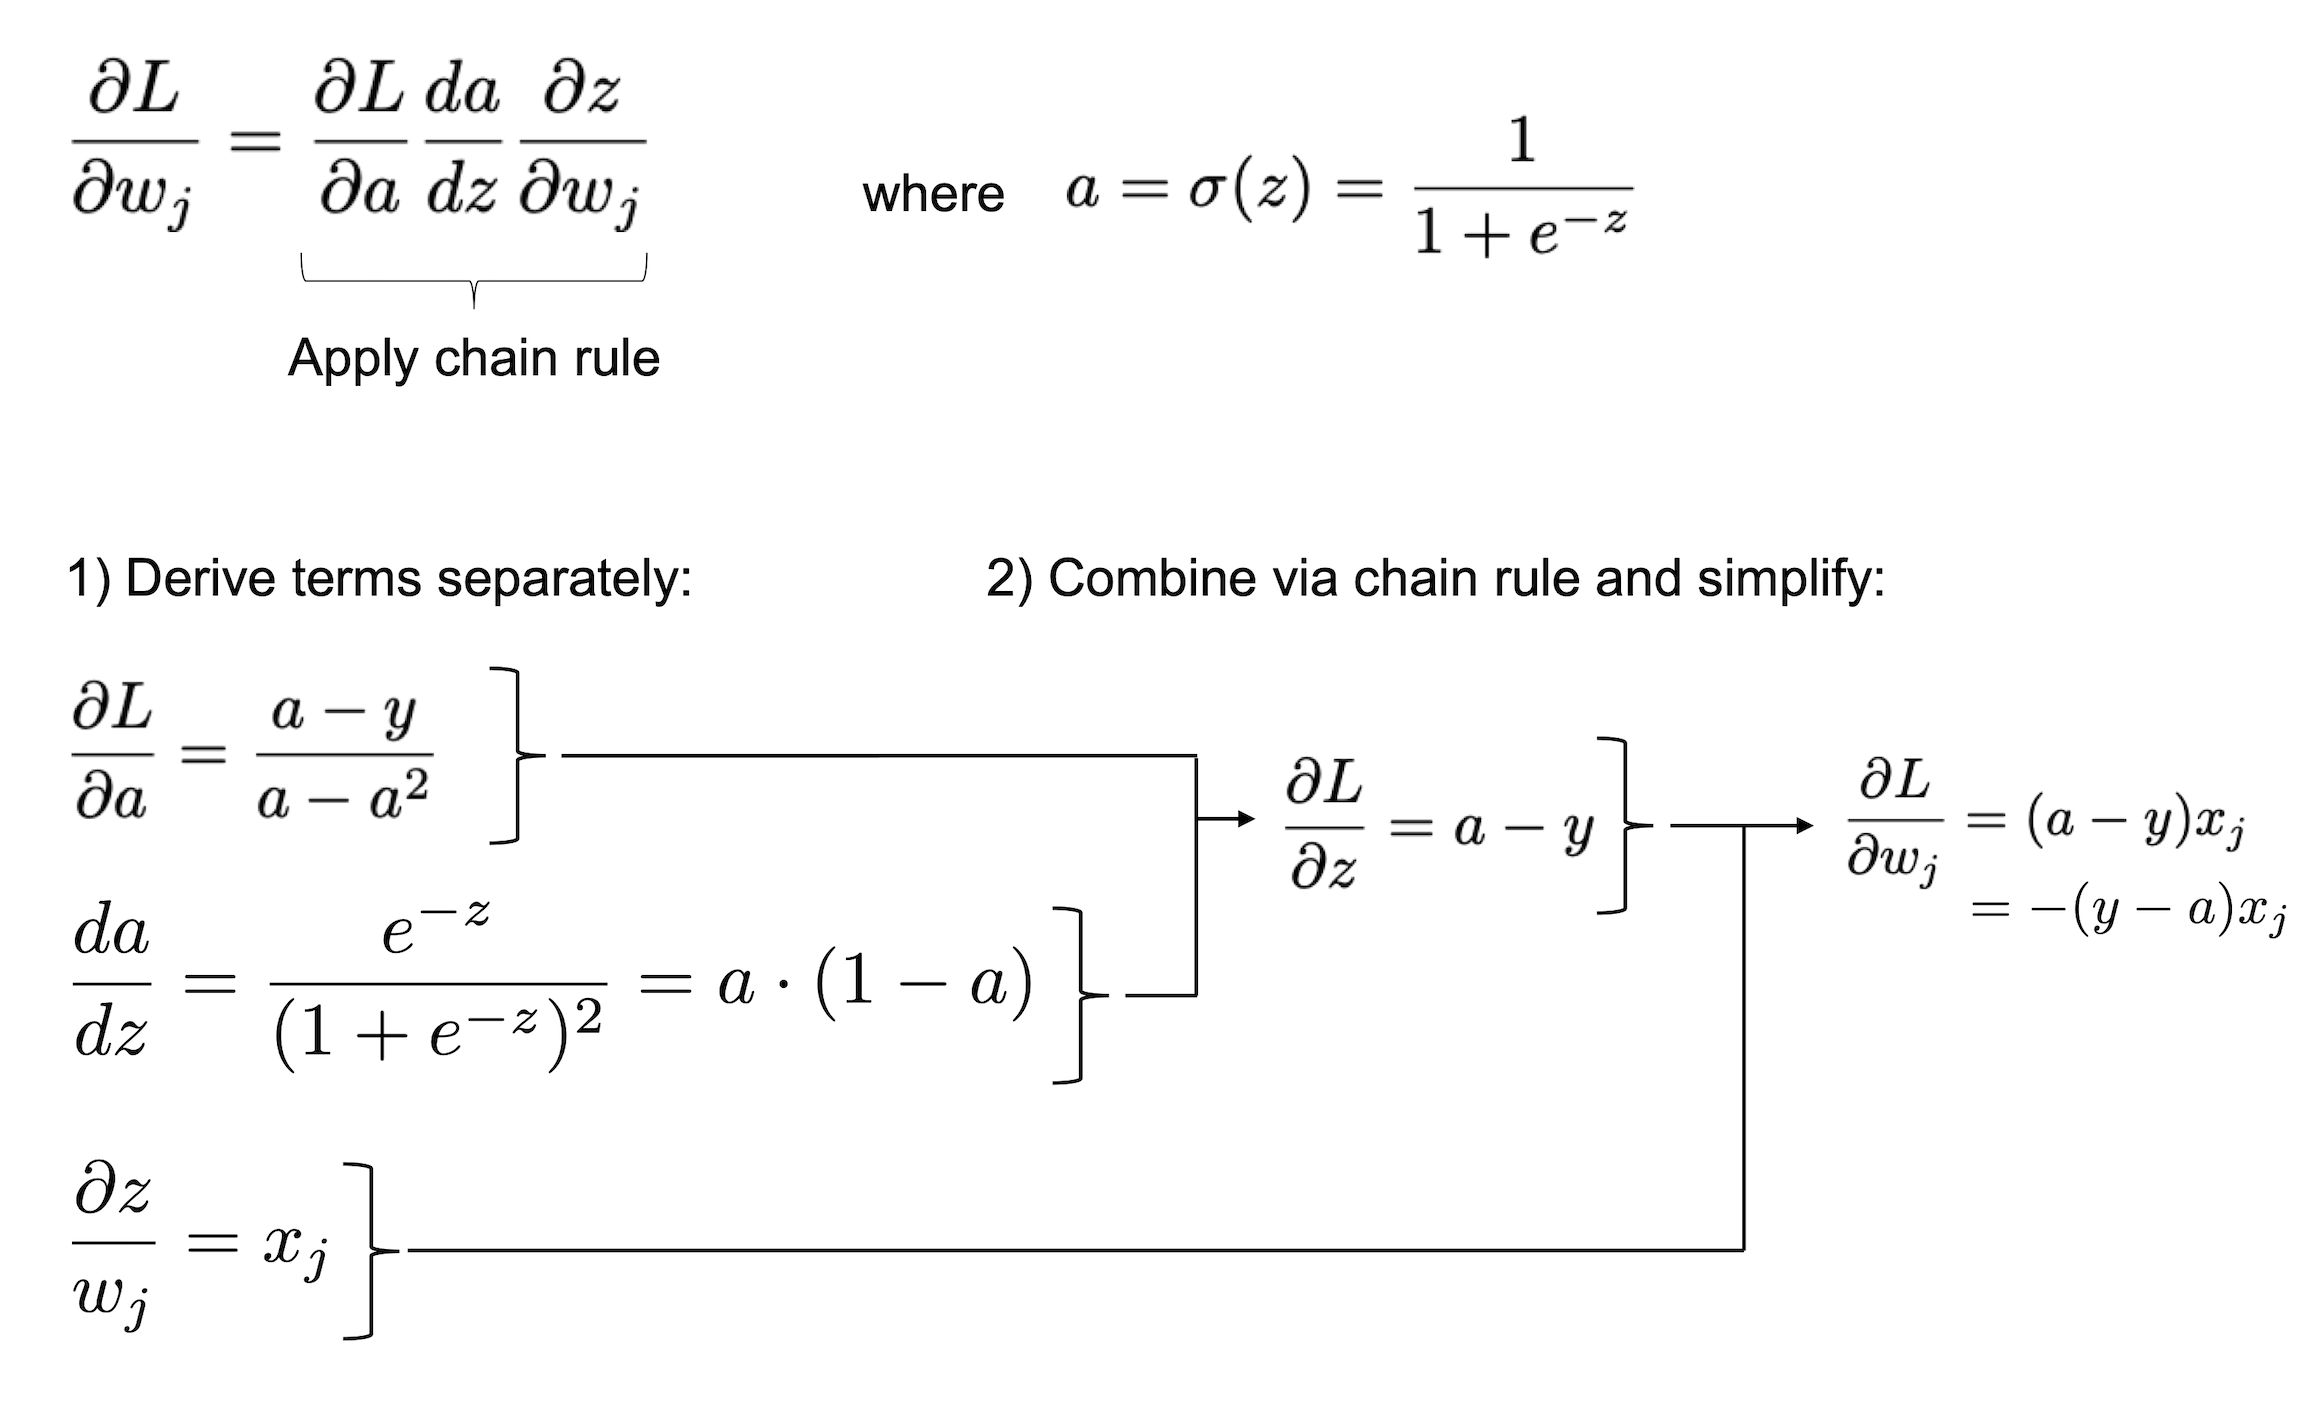

In [ ]:
Image(filename='figures/03_25.png', width=500) 

### Learning the weights of the logistic loss function

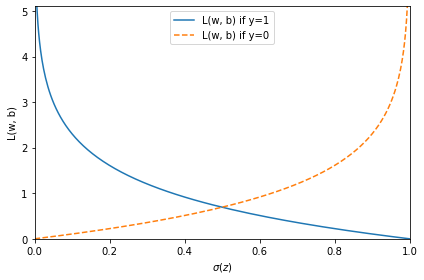

In [ ]:
def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

![](./loss_reg.png)

In [ ]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

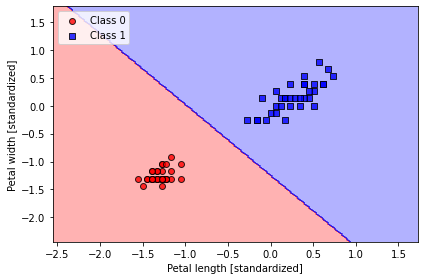

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

## Training a logistic regression model with scikit-learn

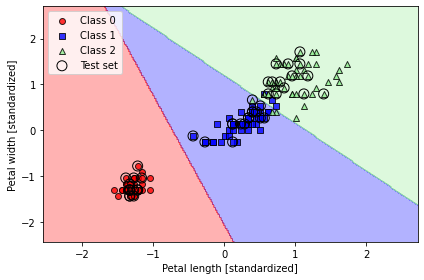

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
#We set multi_class='ovr' for illustration purposes. As an exercise for the reader, 
#you may want to compare the results with multi_class='multinomial'.
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

> Note that there exist many different algorithms for solving optimization problems. For minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD). In fact, scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely, 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'.

> Note that the multinomial setting is now the default choice in scikitlearn’s LogisticRegression class and recommended in practice for mutually exclusive classes, such as those found in the Iris dataset. “mutually exclusive” means that each training example can only belong to a single class (in contrast to multilabel classification, where a training example can be a member of multiple classes).

> C is parameter for regularization and we will be discuss ing it later in the book.

### Prediction

- The probability that training examples belong to a certain class can be computed using the **predict_ proba** method. For example, we can predict the probabilities of the first three examples in the test dataset as follows

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

- The first row corresponds to the class membership probabilities of the first flower, 

- The second row corresponds to the class membership probabilities of the second flower, and so forth. 
  
- We can notice that the column-wise sum in each row is 1, as expected. (You can confirm this by executing lr.predict_ proba(X_test_std[:3, :]).sum(axis=1).)

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

- Also, the highest value in the first row is approximately 0.85, which means that the first example belongs to class 3 (Iris-virginica) with a predicted probability of 85 percent. 

- So, we can get the predicted class labels by identifying the largest column in each row, using NumPy’s argmax function:

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

So, we computed the conditional probabilities and converted these into class labels manually by using NumPy’s argmax function. In practice, the more convenient way of obtaining class labels when using scikit-learn is to call the predict method directly:

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

> Note: if you want to predict the class label of a single flower example: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s reshape method to add a new dimension, as demonstrated here

In [193]:
lr.predict(X_test_std[2, :].reshape(1, -1))

array([0])

In [194]:
# make prediction
y_pred = lr.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


Misclassified examples: 1


In [195]:
# Find model accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


### Tackling overfitting via regularization

- Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). 

- If a model suffers from overfitting, we also say that the model has a **high variance**, which can be caused by having too many parameters, leading to a model that is too complex given the underlying data. 

- Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.


![](2022-08-07-11-46-33.png)

### The bias-variance tradeoff

- In general, we might say that “high variance” is proportional to overfitting and “high bias” is proportional to underfitting.

- In the context of machine learning models, variance measures the consistency (or variability) of the model prediction for classifying a particular example if we retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data. 

- In contrast, bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; bias is the measure of the systematic error that is not due to randomness.

- One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting 

- The concept behind regularization is to introduce additional information to penalize extreme parameter (weight) values. The most common form of regularization is so-called L2 regularization (sometimes also called L2 shrinkage or weight decay),
 

> Regularization and feature normalization Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales

In [224]:
lr = LogisticRegression(C=200.0, solver='lbfgs', multi_class='ovr') 
# C is a regularization parameter

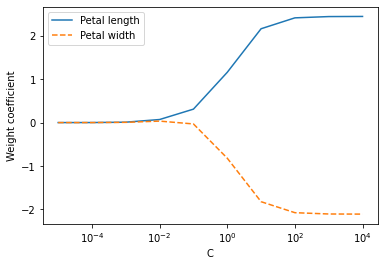

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show()

# Maximum margin classification with support vector machines

- Another powerful and widely used learning algorithm is the support vector machine (SVM), which can be considered an extension of the perceptron. 

- Using the perceptron algorithm, we minimized misclassification errors. However, in SVMs, our optimization objective is to maximize the margin. 

- The margin is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane, which are the so-called **support vectors.**

<center>

<img src="2022-08-07-12-20-21.png" width="500" height="250">

</center>


<center>

<img src="2022-08-07-12-21-29.png" width="500" height="250">

</center>




Maximum margin intuition
> The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error, whereas models with small margins are more prone to overfitting.

## Dealing with the nonlinearly separable case using slack variables

- In SVM, we use a slack variable which is commonly referred to as C in SVM contexts. 

- Large values of C correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for C.

- This concept is related to regularization, where decreasing the value of C increases the bias (underfitting) and lowers the variance (overfitting) of the model.

- We can then use the C parameter to control the width of the margin and therefore tune the bias-variance tradeoff, as illustrated below:




<center>

<img src="2022-08-07-12-26-47.png" width="500" height="250">

</center>


## Training SVM classifier

- using our previous iris dataset, let us train SVM classifier

In [225]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)

svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

The three decision regions of the SVM, visualized after training the classifier is shown below:

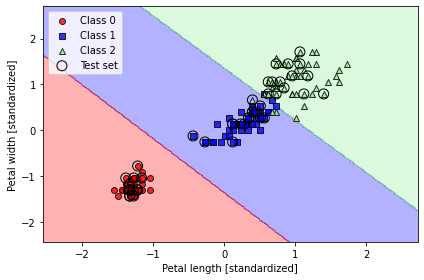

In [226]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

# Solving non-linear problems using a kernel SVM

- Another reason why SVMs enjoy high popularity among machine learning practitioners is that they can be easily kernelized to solve nonlinear classification problems. 

- Kernel SVM is the most common variant of SVMs, 

- let’s first create a synthetic dataset to see what such a nonlinear classification problem may look like

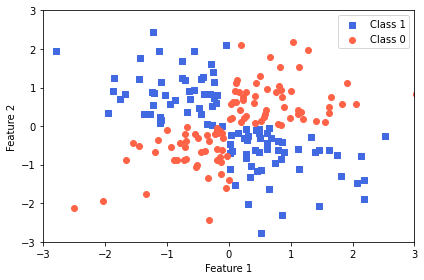

In [227]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

> Obviously, we would not be able to separate the examples from the positive and negative class very well using a linear hyperplane as a decision boundary via the **linear logistic regression or linear SVM model** that we discussed in earlier sections

The basic idea behind kernel methods for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional spac

> Kernel: A kernel is a method of placing a two dimensional plane into a higher dimensional space, so that it is curved in the higher dimensional space. (In simple terms, a kernel is a function from the low dimensional space into a higher dimensional space.) Hence, we have Kernel Trick.




<center>

<img src="2022-08-07-12-55-42.png" width="800" height="500">

</center>



> To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, 𝜙, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, 𝜙, to transform new, unseen data to classify it using the linear SVM model.

### Using the kernel trick to find separating hyperplanes in higher dimensional space

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to les regularization

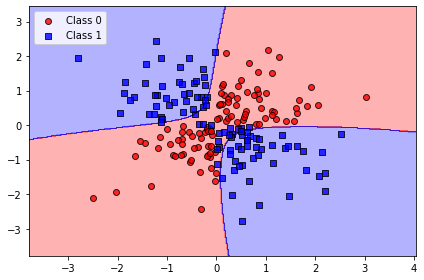

In [212]:
# One of the most widely used kernels is the radial basis function (RBF) kernel,
# which can simply be called the Gaussian kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) #

svm.fit(X_xor, y_xor)


plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

### Effect of Parameters

If we increase the value for gamma, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary.

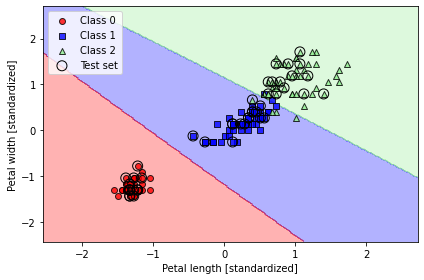

In [214]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.02, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show()

> Since we chose a relatively small value for 𝛾𝛾, the resulting decision boundary of the RBF kernel SVM model will be relatively soft


Now, let’s increase the value of 𝛾 and observe the effect on the decision boundary:

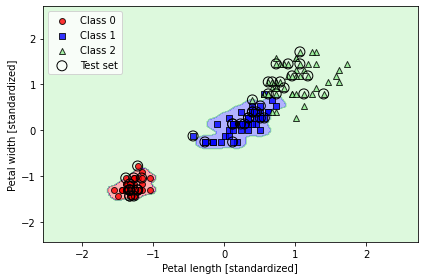

In [234]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

- we can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of gamma.

- Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. 

- This illustrates that the gamma parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset. 

> Exercise: Try different values of Gamma and see how the decision boundary changes. Understand the advantage and disadvantage using LinearSVM, KernelSVM, Logistic Regression.


# Decision tree learning

- Decision tree classifiers are attractive models if we care about interpretability. 

- As the name “decision tree” suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

- Let’s consider the following example in which we use a decision tree to decide upon an activity on a particular day
 


<center>

<img src="2022-08-07-13-28-54.png" width="800" height="300">

</center>



## Building a decision tree

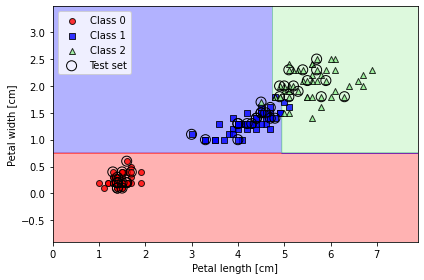

In [217]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

> Note: Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms

## Visulizing Decision Tree

A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after training via the following code:

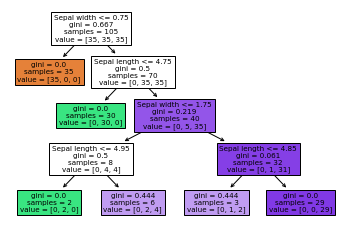

In [235]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
# Setting filled=True, we called colors the nodes by the majority class label at that node. There are many additional options available, which you can find in the documentation 
# at https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html.

#plt.savefig('figures/03_21_1.pdf')
plt.show()

- Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree determined from our training dataset. 

- Regarding the feature splitting criterion at each node, note that the branches to the left correspond to “True” and branches to the right correspond to “False.”

## Combining weak to strong learners via random forests

- Ensemble methods have gained huge popularity in applications of machine learning during the last decade due to their good classification performance and robustness toward overfitting. 

- Ensemble methods, including bagging and boosting, later in Chapter 7. Here, we present an example of Random Forest classifier

> Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).




<center>

<img src="2022-08-07-14-00-43.png" width="500" height="300">

</center>




> A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

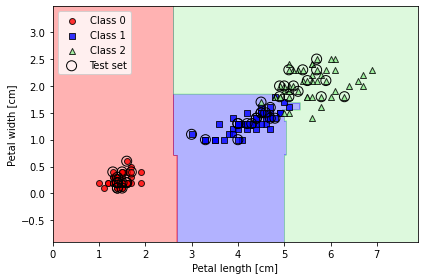

In [236]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,  #The number of trees in the forest.deafult=100
                                random_state=1,
                                n_jobs=2)
# we used the n_jobs parameter for demonstration purposes, 
# which allows us to parallelize the model training using multiple cores of our computer (here, two cores)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()

# K-nearest neighbors - a lazy learning algorithm

- The last supervised learning algorithm that we want to discuss in this chapter is the k-nearest neighbor (KNN) classifier, which is particularly interesting because it is fundamentally different from the learning algorithms that we have discussed so far
  
- KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps: 

1. Choose the number of k and a distance metric 

2. Find the k-nearest neighbors of the data record that we want to classify 

3. Assign the class label by majority vote

Figure below show how a new data point (?) is assigned the triangle class label based on majority voting among its five nearest neighbors:

<center>

<img src="2022-08-07-14-04-03.png" width="500" height="300">

</center>


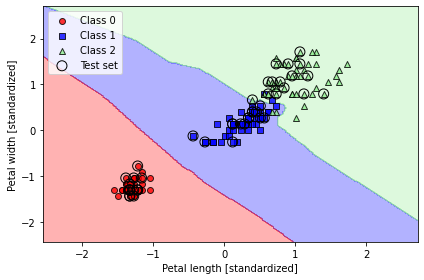

In [222]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)



plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()

# Summary

- In this chapter, you learned about many different machine learning algorithms that are used to tackle linear and nonlinear problems. 

- You have seen that decision trees are particularly attractive if we care about interpretability. 


- Although SVMs are powerful linear models that can be extended to nonlinear problems via the kernel trick, they have many parameters that have to be tuned in order to make good predictions. 

- In contrast, ensemble methods, such as random forests, don’t require much parameter tuning and don’t overfit as easily as decision trees, which makes them attractive models for many practical problem domains. 

- The KNN classifier offers an alternative approach to classification via lazy learning that allows us to make predictions without any model training, but with a more computationally expensive prediction step.

- However, even more important than the choice of an appropriate learning algorithm is the available data in our training dataset. No algorithm will be able to make good predictions without informative and discriminatory features. 

- In the next chapter, we will discuss important topics regarding the preprocessing of data, feature selection, and dimensionality reduction, which means that we will need to build powerful machine learning models. 